In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('../src/')
import mnist
from binary_rbm_numpy import *

First load the data and make it binary

In [3]:
X_train, n_row, n_col = mnist.load_images('../data/train-images.idx3-ubyte')
y_train = mnist.load_labels('../data/train-labels.idx1-ubyte')
X_test, _, _ = mnist.load_images('../data/t10k-images.idx3-ubyte')
y_test = mnist.load_labels('../data/t10k-labels.idx1-ubyte')

X_train = np.around(X_train/np.amax(X_train))
X_test = np.around(X_test/np.amax(X_test))

Filter the data so that only images of twos remain

In [4]:
where = y_train == 2
y_train_2 = y_train[where]
X_train_2 = X_train[where,:]
where = y_test == 2
y_test_2 = y_test[where]
X_test_2 = X_test[where,:]

Look at some example images

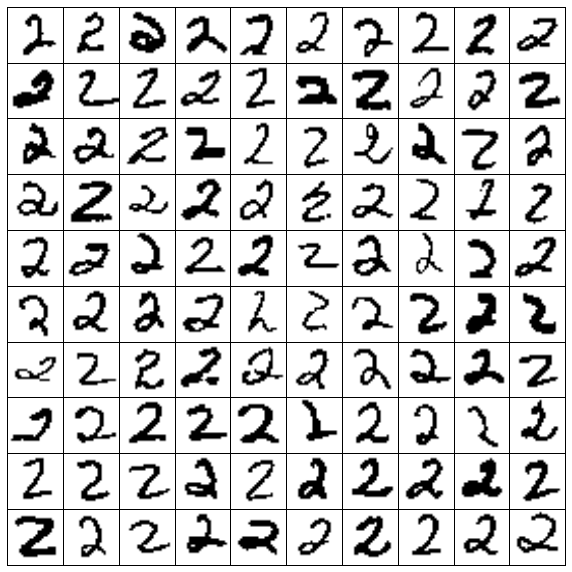

In [5]:
fig1 = mnist.plot_multiple_images(X_train_2[np.random.randint(0,X_train_2.shape[0],100),:])

Train an RBM on this using k-PCD

In [6]:
rbm_pcd = RestrictedBoltzmannMachine(n_row*n_col,100)
rbm_pcd.fit(X_train_2,0.01,k=5,n_iter=20,batch_size=10,persistent=True)

iteration	0	squared_reconstruction_error	0.158149	
iteration	1	squared_reconstruction_error	0.135174	
iteration	2	squared_reconstruction_error	0.122565	
iteration	3	squared_reconstruction_error	0.116659	
iteration	4	squared_reconstruction_error	0.109491	
iteration	5	squared_reconstruction_error	0.105963	
iteration	6	squared_reconstruction_error	0.101350	
iteration	7	squared_reconstruction_error	0.099398	
iteration	8	squared_reconstruction_error	0.095655	
iteration	9	squared_reconstruction_error	0.093512	
iteration	10	squared_reconstruction_error	0.092828	
iteration	11	squared_reconstruction_error	0.089357	
iteration	12	squared_reconstruction_error	0.088569	
iteration	13	squared_reconstruction_error	0.087559	
iteration	14	squared_reconstruction_error	0.085286	
iteration	15	squared_reconstruction_error	0.083779	
iteration	16	squared_reconstruction_error	0.082240	
iteration	17	squared_reconstruction_error	0.081402	
iteration	18	squared_reconstruction_error	0.080517	
iteration	19	squared_r

Visualize the weights

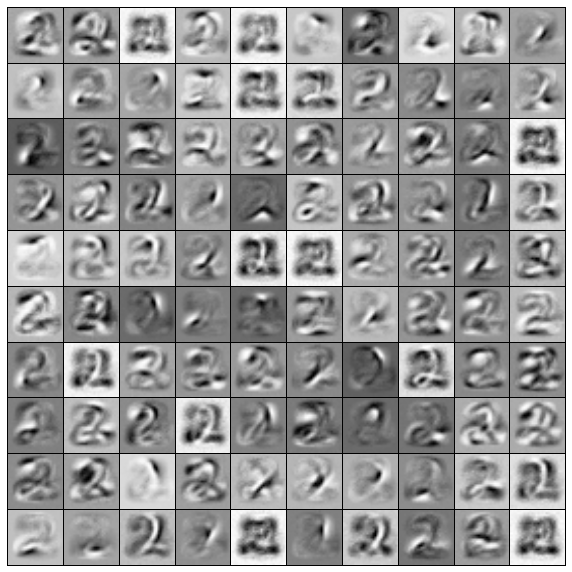

In [7]:
fig3 = mnist.plot_multiple_images(rbm_pcd.weights)
plt.show()

Visualize the biases for the visible units

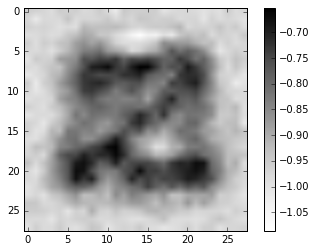

In [8]:
plt.imshow(np.reshape(rbm_pcd.bias_v,(28,28)),cmap='Greys')
plt.colorbar()

Visualize the biases for the hidden units

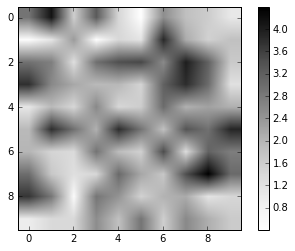

In [9]:
plt.imshow(np.reshape(rbm_pcd.bias_h,(10,10)),cmap='Greys')
plt.colorbar()

Lets look at the reconstructions of some test set images

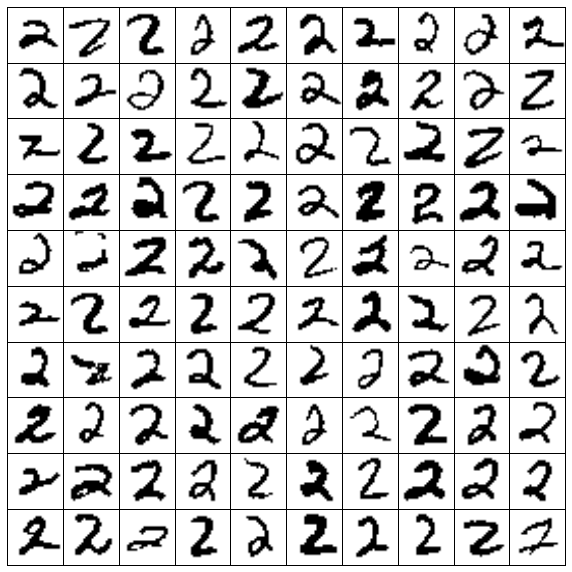

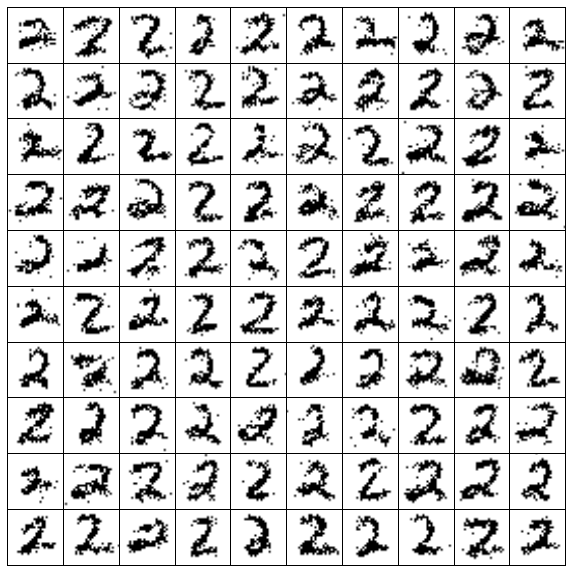

In [10]:
X_sub = X_test_2[np.random.randint(0,X_test_2.shape[0],100)]
_, _, _, X_rec = rbm_pcd.gibbs_step(X_sub)
f1 = mnist.plot_multiple_images(X_sub)
f2 = mnist.plot_multiple_images(X_rec)

Generate pictures of twos from an arbitrary input vector. Start by generating an arbitrary vector.

(1, 784)


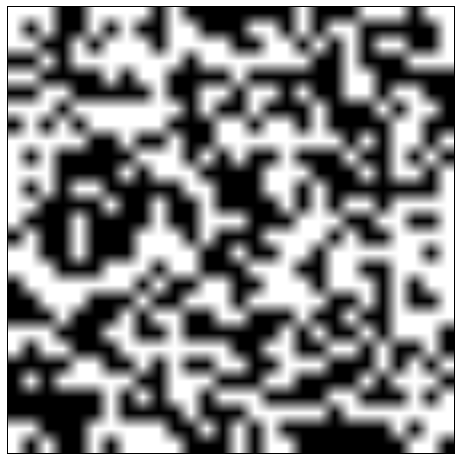

In [11]:
v_rand = np.random.randint(0,2,n_row*n_col)
v_rand = np.reshape(v_rand,(1,n_row*n_col))
print v_rand.shape
fig4 = mnist.plot_image(v_rand,0)

Now feed this vector to the RBM and perform markov sampling on it. The result looks like a handwritten two.

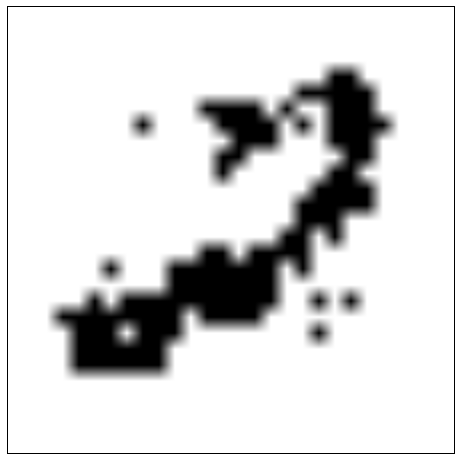

In [15]:
for i in xrange(0,100):
    _, _, _, v_rand = rbm_pcd.gibbs_step(v_rand)
fig5 = mnist.plot_image(v_rand,0)

Lets generate another handwritten two

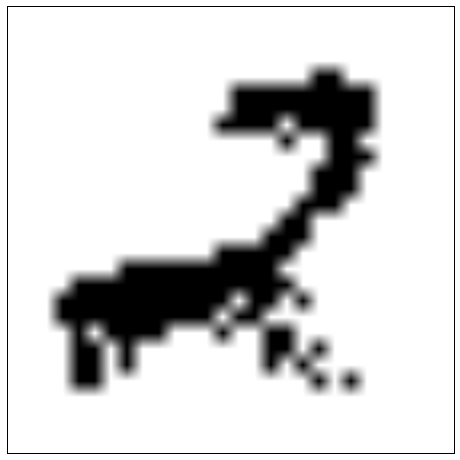

In [17]:
for i in xrange(0,100):
    _, _, _, v_rand = rbm_pcd.gibbs_step(v_rand)
fig6 = mnist.plot_image(v_rand,0)

Let's see how well regular CD works

In [18]:
rbm_cd = RestrictedBoltzmannMachine(n_row*n_col,100)
rbm_cd.fit(X_train_2,0.01,k=5,n_iter=20,batch_size=10,persistent=False)

iteration	0	squared_reconstruction_error	0.142180	
iteration	1	squared_reconstruction_error	0.121965	
iteration	2	squared_reconstruction_error	0.112665	
iteration	3	squared_reconstruction_error	0.105103	
iteration	4	squared_reconstruction_error	0.099698	
iteration	5	squared_reconstruction_error	0.095095	
iteration	6	squared_reconstruction_error	0.091410	
iteration	7	squared_reconstruction_error	0.088868	
iteration	8	squared_reconstruction_error	0.086374	
iteration	9	squared_reconstruction_error	0.084180	
iteration	10	squared_reconstruction_error	0.082229	
iteration	11	squared_reconstruction_error	0.080780	
iteration	12	squared_reconstruction_error	0.079426	
iteration	13	squared_reconstruction_error	0.077951	
iteration	14	squared_reconstruction_error	0.076560	
iteration	15	squared_reconstruction_error	0.075254	
iteration	16	squared_reconstruction_error	0.074576	
iteration	17	squared_reconstruction_error	0.073330	
iteration	18	squared_reconstruction_error	0.073015	
iteration	19	squared_r

Note that the squared reconstruction error is smaller than when trainin with PCD. However, as shown below this is misleading.

Lets have a look at the weights and biases again

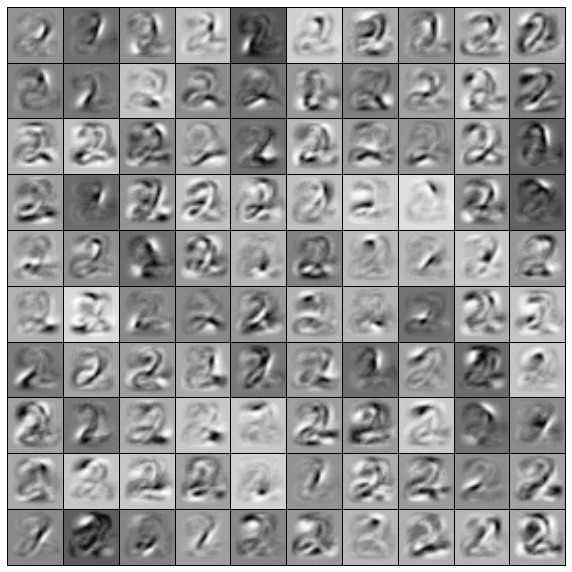

In [19]:
fig3 = mnist.plot_multiple_images(rbm_cd.weights)
plt.show()

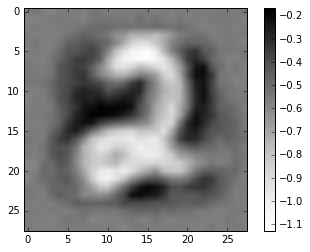

In [20]:
plt.imshow(np.reshape(rbm_cd.bias_v,(28,28)),cmap='Greys')
plt.colorbar()

It is strange that the biases for the visible units which are likely to represent a two are negative.

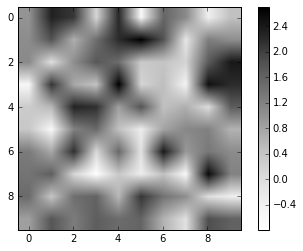

In [21]:
plt.imshow(np.reshape(rbm_cd.bias_h,(10,10)),cmap='Greys')
plt.colorbar()

Again we can start by looking at reconstructions of images from the test set

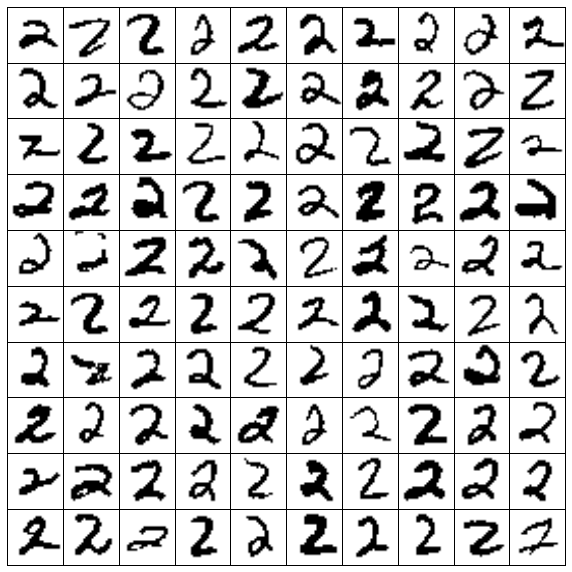

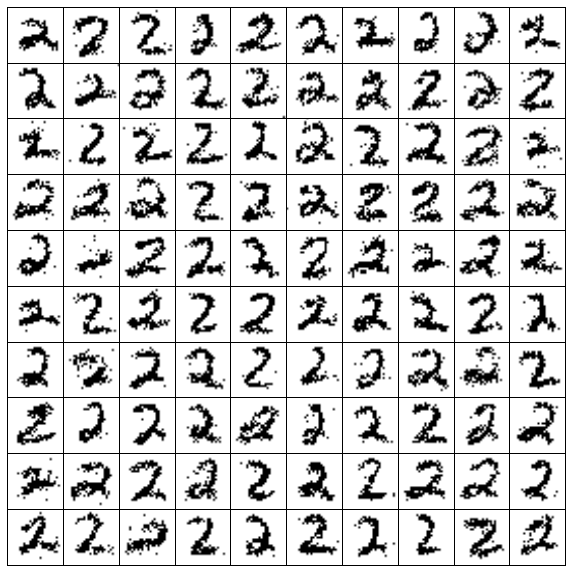

In [22]:
_, _, _, X_rec_cd = rbm_cd.gibbs_step(X_sub)
f3 = mnist.plot_multiple_images(X_sub)
f4 = mnist.plot_multiple_images(X_rec_cd)

This looks god

Next, let's try to generate a picture of a two from an arbitrary input vector

(1, 784)


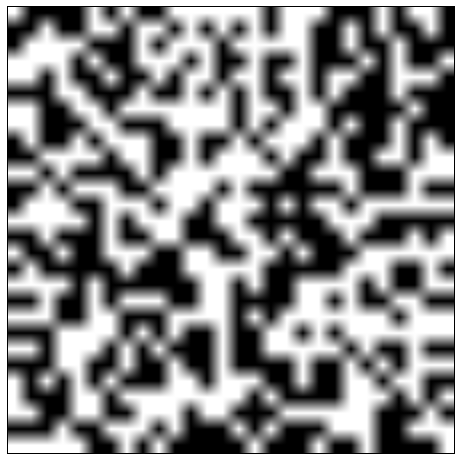

In [23]:
v_rand = np.random.randint(0,2,n_row*n_col)
v_rand = np.reshape(v_rand,(1,n_row*n_col))
print v_rand.shape
fig7 = mnist.plot_image(v_rand,0)

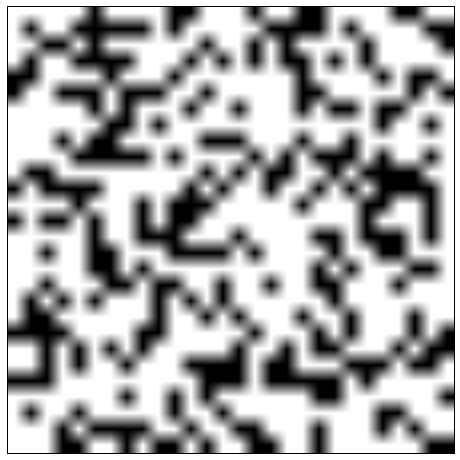

In [24]:
for i in xrange(0,100):
    _, _, _, v_rand = rbm_cd.gibbs_step(v_rand)
fig8 = mnist.plot_image(v_rand,0)

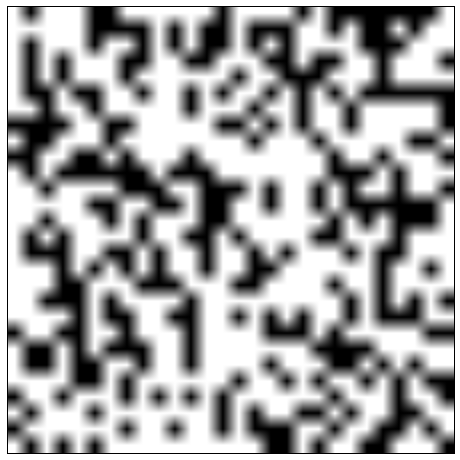

In [25]:
for i in xrange(0,100):
    _, _, _, v_rand = rbm_cd.gibbs_step(v_rand)
fig9 = mnist.plot_image(v_rand,0)

This does not work. Probably, because the RBM did not learn the underlying distribution well enough. Let's try to see what happens if we use more iterations when fitting (I'm suppressing the output from the fit function).

In [26]:
rbm_cd = RestrictedBoltzmannMachine(n_row*n_col,100)
rbm_cd.fit(X_train_2,0.01,k=5,n_iter=200,batch_size=10,persistent=False,verbose=False)

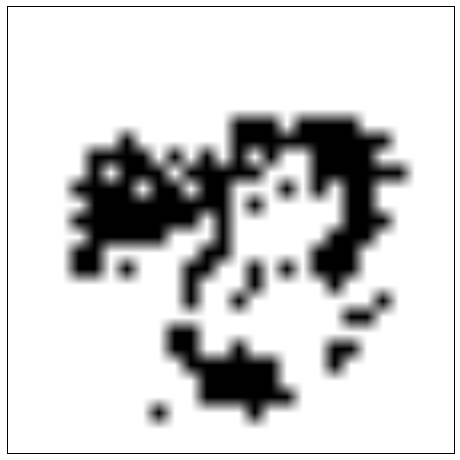

In [40]:
v_rand = np.random.randint(0,2,n_row*n_col)
v_rand = np.reshape(v_rand,(1,n_row*n_col))
for i in xrange(0,100):
    _, _, _, v_rand = rbm_cd.gibbs_step(v_rand)
fig10 = mnist.plot_image(v_rand,0)

This is an improvement. Let's try again with another random vector.

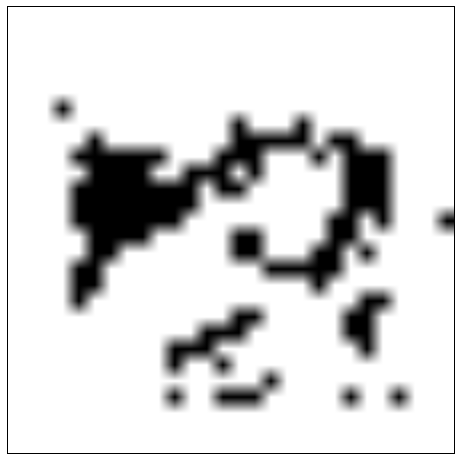

In [36]:
v_rand = np.random.randint(0,2,n_row*n_col)
v_rand = np.reshape(v_rand,(1,n_row*n_col))
for i in xrange(0,100):
    _, _, _, v_rand = rbm_cd.gibbs_step(v_rand)
fig10 = mnist.plot_image(v_rand,0)

The results are mixed. Lets have a look at the weights and biases.

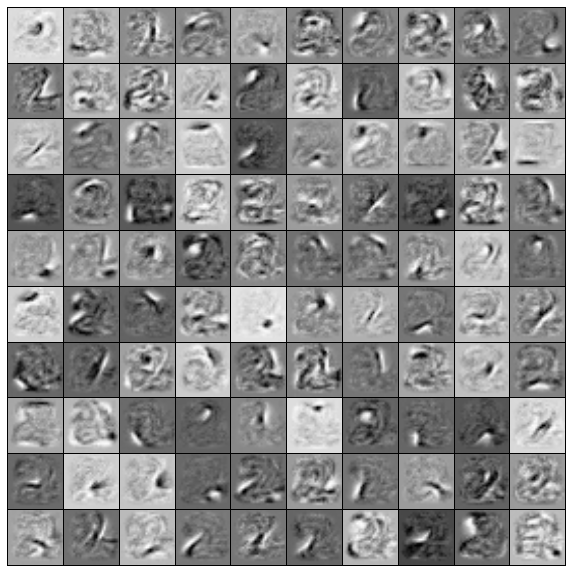

In [41]:
mnist.plot_multiple_images(rbm_cd.weights)
plt.show()

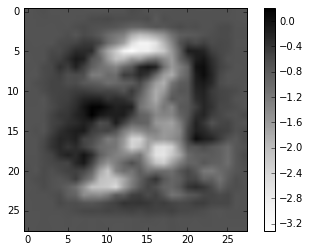

In [42]:
plt.imshow(np.reshape(rbm_cd.bias_v,(28,28)),cmap='Greys')
plt.colorbar()

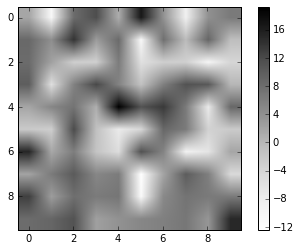

In [43]:
plt.imshow(np.reshape(rbm_cd.bias_h,(10,10)),cmap='Greys')
plt.colorbar()

Qualitatively the biases are similar to before. The weights also look qualitatively similar to before.

In [44]:
rbm_pcd.save_state_to_file('numpy_only_twos_pcd')

In [45]:
rbm_cd.save_state_to_file('numpy_only_twos_cd')